## Stats701 Homework 9, Winter 2018
### MapReduce, Hadoop and Spark
### Katherine Wilkinson
#### kswilk@umich.edu

I discussed this homework with Sam Edds and Alex Everett

In [7]:
from mrjob.job import MRJob
import re
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy.stats as pystat
import numpy as np

### 1 Counting words with mrjob

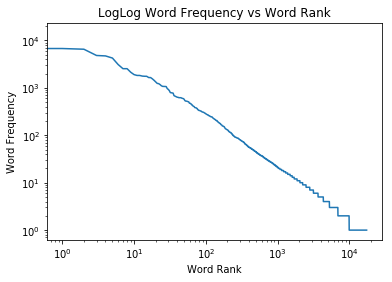

In [6]:
simple = open('word_counts.txt')
ls = list(simple)
simple_pairs = []

for i in ls:
    simple_pairs.append(i.replace('\n', '').replace('\t',',').replace('"', '').replace(' ',''))

simple_pairs2 = []
for j in simple_pairs:
    simple_pairs2.append(j.split(','))
    
simple_x = []
simple_y = []
simple_pairs2.sort()
for k in range(len(simple_pairs2)):
    simple_pairs2[k][0] = int(simple_pairs2[k][0])
    simple_x.append(simple_pairs2[k][0])
    simple_y.append(simple_pairs2[k][1])


count = sorted(simple_x, reverse = True)

x_axis = np.arange(1,10,1)
plt.title('LogLog Word Frequency vs Word Rank')
plt.xlabel('Word Rank')
plt.ylabel('Word Frequency')
plt.loglog(count)

_ = plt.show

#### 1.5

Our plot is slightly Zipfian. The plot is approximately a line with some curvative and steps at the edges. 

#### 2
Write an mrjob job that takes text as input and counts how many times each word
occurs in the text. 

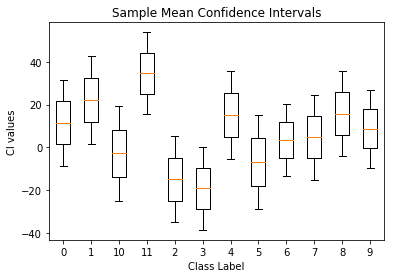

In [4]:
pop = open('summary_large.txt')

pop_ls = list(pop)

sum_ls = []
for i in pop_ls:
    rp = i.replace('\t',',').replace('\n','').replace('[','').replace(']','').replace('"','')
    rp = rp.split(",")
    sum_ls.append(rp)


x = []
y = []
for j in range(len(sum_ls)):
    x.append(sum_ls[j][0])
    y.append((sum_ls[j][1:]))
for n in y:
    for s in range(len(n)):
        n[s] = float(n[s])
    
sum_dict = dict(zip(x, y))

ub = 0
lb = 0
ci ={}

for key, value in sum_dict.items():
    ub = value[1] + 1.96*(np.sqrt(value[2])/np.sqrt(value[0]))
    lb = value[1] - 1.96*(np.sqrt(value[2])/np.sqrt(value[0]))
    #ci.append((ub,lb))
    ci[key] = [lb,ub]

fig, ax = plt.subplots()
plt.title('Sample Mean Confidence Intervals')
plt.ylabel('CI values')
plt.xlabel('Class Label')
plt.boxplot(ci.values())
ax.set_xticklabels(ci.keys())
_=plt.show()

### 3. Graph Processing: Counting Triangles with PySpark

In [ ]:
##ssh kswilk@flux-hadoop-login.arc-ts.umich.edu
##python MRtest.py -r hadoop hdfs:///var/stat701w18/moby_dick.txt>word_counts.txt
#scp /Users/maraudersmap/Documents/STATS_701_PYTHON/kswilk_hw9/word_counts.txt word_counts.txt

#data =sc.textFile('hdfs:///var/stat701w18/fof/friends.simple')

# spark-submit --master yarn --queue teaching triangles_final.py /var/stat701w18/fof/friends.simple triangles_small3

# hdfs dfs -ls spark_output/
# hdfs dfs -cat triangles_small3/* > small_triangle_list.txt

# spark-submit --master yarn --queue teaching triangles.py /var/stat701w18/fof/friends1000 triangles_large

# hdfs dfs -cat triangles_large/* > big_triangle_list.txt

#spark-submit --master yarn --driver-memory 4G --driver-cores 100 --num-executors 200  --queue teaching triangles_final.py /var/stat701w18/fof/friends1000 triangles_large

